## 🔵 Step 1: Import Dependencies and Dataset

We begin by importing the necessary libraries and loading our synthetic dataset.


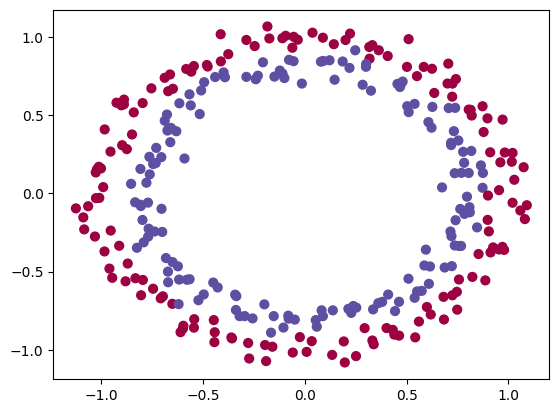

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

train_X, train_Y, test_X, test_Y = load_dataset()


## 🔵 Step 2: Define the Model Function

We implement a 3-layer neural network with the option to initialize the parameters using:
- `"zeros"`: all weights set to zero.
- `"random"`: random initialization with large values.
- `"he"`: He initialization optimized for ReLU.


In [2]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]

    # Choose initialization method
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    for i in range(num_iterations):
        a3, cache = forward_propagation(X, parameters)
        cost = compute_loss(a3, Y)
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)

    # Plot cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters


## 🔵 Step 3: Zero Initialization

This initialization sets all weights to zero.


In [4]:
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


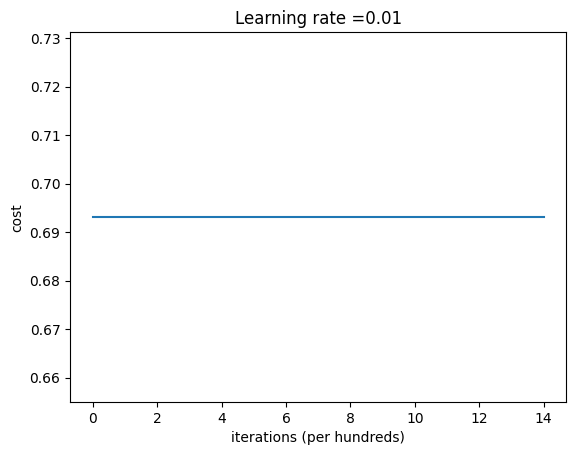

Train:


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [5]:
parameters = model(train_X, train_Y, initialization = "zeros")
print("Train:")
predict(train_X, train_Y, parameters)
print("Test:")
predict(test_X, test_Y, parameters)

plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


## 🔵 Step 4: Random Initialization

Weights are initialized randomly (scaled by 10).


In [6]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters


c:\Ai\DL_specialization\2_Improving_NNets\1\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
c:\Ai\DL_specialization\2_Improving_NNets\1\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6239567039908781
Cost after iteration 2000: 0.5978043872838292
Cost after iteration 3000: 0.563595830364618
Cost after iteration 4000: 0.5500816882570866
Cost after iteration 5000: 0.5443417928662615
Cost after iteration 6000: 0.5373553777823036
Cost after iteration 7000: 0.4700141958024487
Cost after iteration 8000: 0.3976617665785177
Cost after iteration 9000: 0.39344405717719166
Cost after iteration 10000: 0.39201765232720626
Cost after iteration 11000: 0.38910685278803786
Cost after iteration 12000: 0.38612995897697244
Cost after iteration 13000: 0.3849735792031832
Cost after iteration 14000: 0.38275100578285265


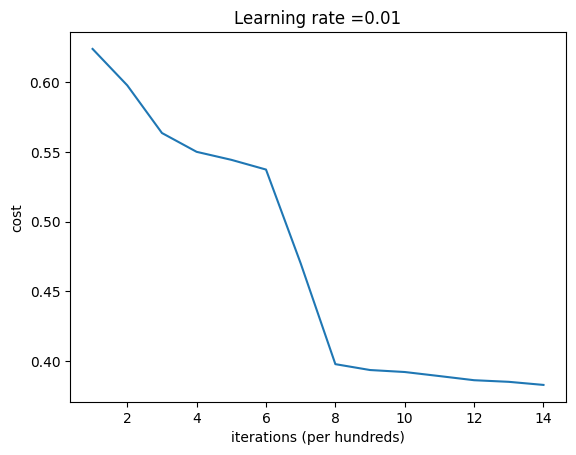

Train:


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [7]:
parameters = model(train_X, train_Y, initialization = "random")
print("Train:")
predict(train_X, train_Y, parameters)
print("Test:")
predict(test_X, test_Y, parameters)

plt.title("Model with Random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


## 🔵 Step 5: He Initialization (Recommended)

He initialization is scaled according to layer size and is suited for ReLU activations.


In [8]:
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2 / layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071794
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322562
Cost after iteration 9000: 0.18597287209206836
Cost after iteration 10000: 0.15015556280371817
Cost after iteration 11000: 0.12325079292273552
Cost after iteration 12000: 0.09917746546525932
Cost after iteration 13000: 0.08457055954024274
Cost after iteration 14000: 0.07357895962677362


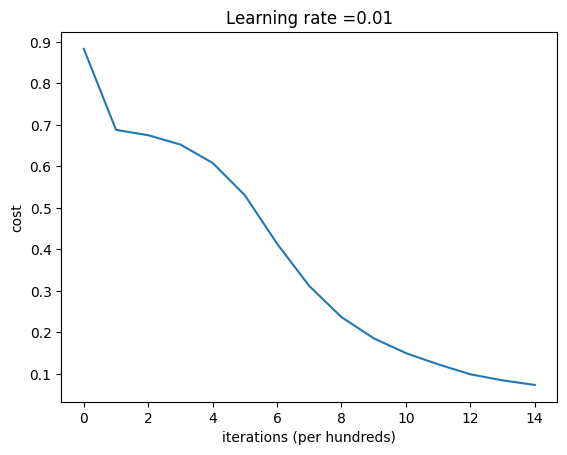

Train:


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [9]:
parameters = model(train_X, train_Y, initialization = "he")
print("Train:")
predict(train_X, train_Y, parameters)
print("Test:")
predict(test_X, test_Y, parameters)

plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


## ✅ Final Comparison of Initializations

- **Zero Initialization**: Leads to poor performance because all neurons start symmetrically.
- **Random Initialization**: Can lead to instability due to very large weights.
- **He Initialization**: Best performance thanks to proper scaling that avoids vanishing/exploding gradients.

📌 Recommendation: Use **He initialization** for networks using ReLU.
